<a href="https://colab.research.google.com/github/AJ82981/Cardiovascular_Risk_Prediction/blob/main/Classification_Cardiovascular_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Cardiovascular Risk Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The Cardiovascular Risk Prediction project aims to develop a predictive model that assesses the risk of cardiovascular diseases in individuals based on their health attributes. Cardiovascular diseases are a leading cause of mortality worldwide, and early detection and risk assessment can lead to timely interventions and improved healthcare outcomes. This project involves utilizing machine learning techniques to analyze medical data and predict the likelihood of an individual developing cardiovascular diseases, providing valuable insights for healthcare professionals and patients.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core problem addressed in this project is to predict the risk of cardiovascular diseases in individuals based on their health-related attributes. The project seeks to answer questions such as:

- Can we develop a reliable predictive model for identifying individuals at risk of cardiovascular diseases?
- What are the key health attributes that contribute to predicting cardiovascular risk?
- How accurate and interpretable can the predictive model be for healthcare professionals and patients?
- How can the model's predictions contribute to early intervention and prevention strategies?
- What additional insights can be derived from analyzing the relationships between health attributes and cardiovascular risk?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# from ShuffleSplit import shuffle_split_cv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.svm import SVC

# !pip install shap==0.40.0
# import shap
# import graphviz
# sns.set_style('darkgrid')

# import warnings
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Classification - ML Project/data_cardiovascular_risk.csv'

In [ ]:
df_org = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df = df_org.copy()
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.drop('id',axis=1,inplace=True)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
cat_vars = ['education','prevalentHyp','sex','is_smoking','BPMeds','prevalentStroke','diabetes','TenYearCHD']
num_vars = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

##### Categorical varibales with missing values
education - 87

BPMeds - 44


###### Replacing missing values in categorical variables with most frequent value

In [ ]:
print(df['education'].value_counts(),'\n',df['BPMeds'].value_counts())

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64 
 0.0    3246
1.0     100
Name: BPMeds, dtype: int64


In [ ]:
print(df['education'].isna().sum(),'\n',df['BPMeds'].isna().sum())

87 
 44


In [ ]:
df['education']=df['education'].fillna(df['education'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
print(df['education'].isna().sum(),'\n',df['BPMeds'].isna().sum())

0 
 0


In [ ]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


##### Numerical Variables with missing values
cigsPerDay - 22

totChol - 38

BMI - 14

glucose - 304

###### cigsPerDay

In [ ]:
df[(df['cigsPerDay']).isnull()]['is_smoking'].count()

22

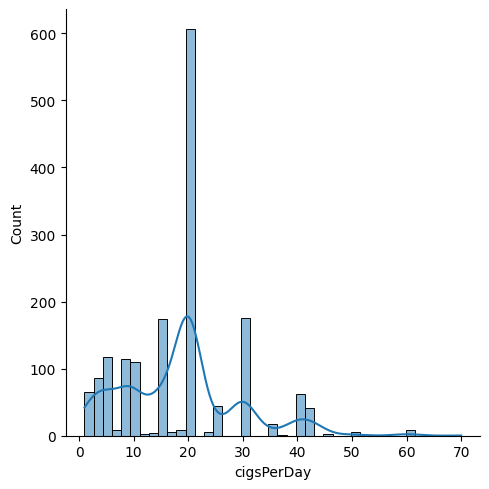

In [ ]:
# sns.distplot(df[df['is_smoking']=='YES']['cigsPerDay'])
sns.displot(data=df[df['is_smoking'] == 'YES'], x='cigsPerDay', kde=True)
plt.show()

<Axes: >

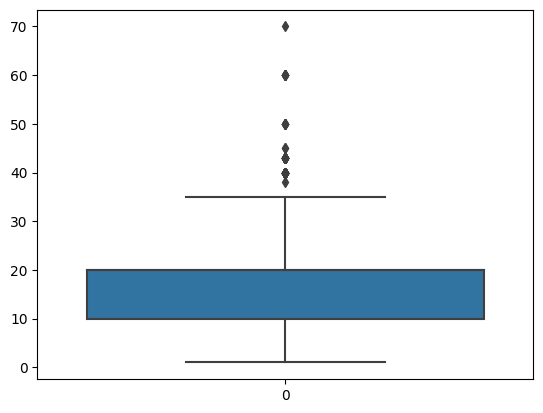

In [ ]:
sns.boxplot(df[df['is_smoking']=='YES']['cigsPerDay'])

Since the column contains outliers the missing values can be replaced with the median value of the column

In [ ]:
df['cigsPerDay'].isna().sum()

22

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [ ]:
df['cigsPerDay'].isna().sum()

0

In [ ]:
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Check Unique Values for each variable.
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

The unique value for :

age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###### BMI, totChol and heartRate - Replacing missing values with most frequent value

In [ ]:
print('BMI -',df['BMI'].isnull().sum(),'\n',
      'totChol -',df['totChol'].isnull().sum(),'\n',
      'heartRate -',df['heartRate'].isnull().sum())

BMI - 14 
 totChol - 38 
 heartRate - 1


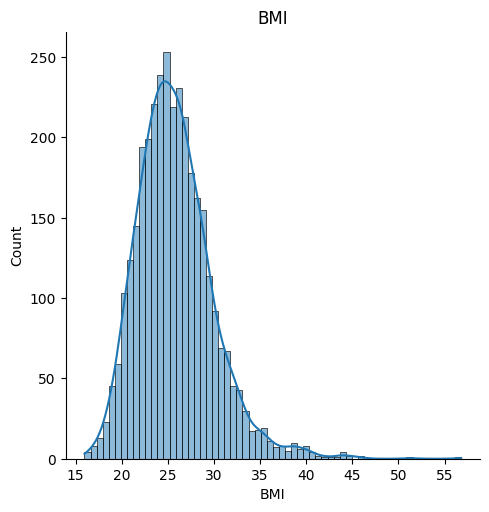

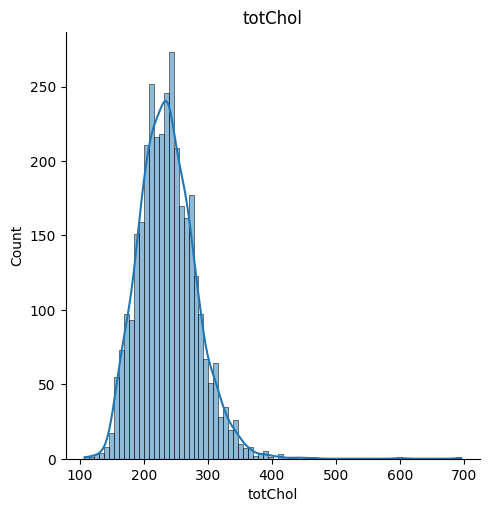

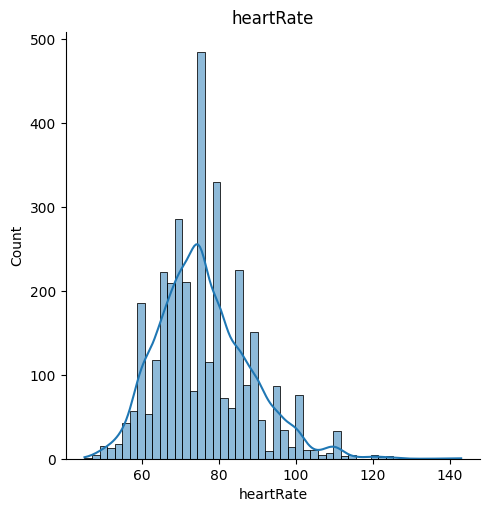

In [ ]:
for i in ['BMI','totChol','heartRate']:
  sns.displot(data=df, x=i, kde=True)
  plt.title(i)
  plt.show()

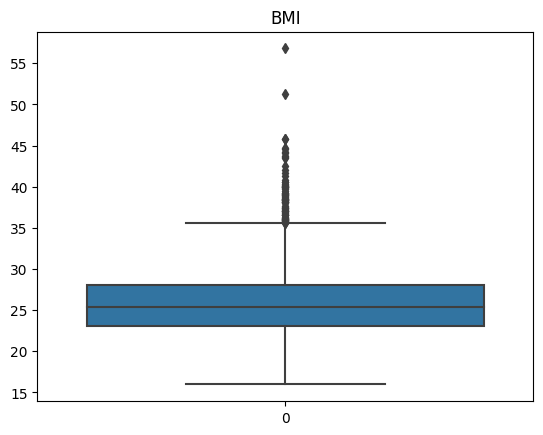

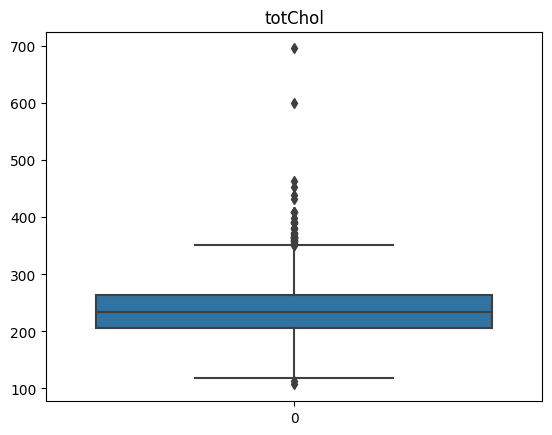

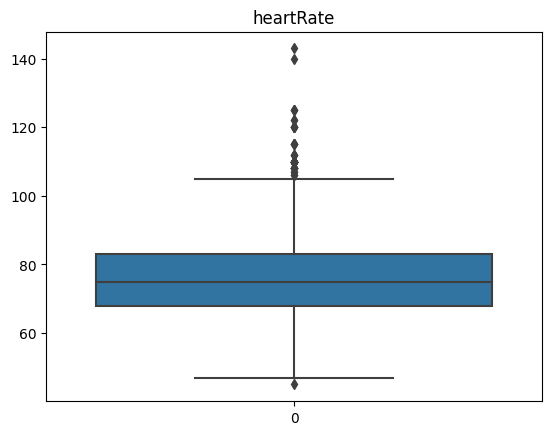

In [ ]:
for i in ['BMI','totChol','heartRate']:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

BMI, totChol and heartRate consists of outliers, hence we can replace the missing values with the median of the respected columns

In [ ]:
for i in ['BMI','totChol','heartRate']:
  print(df[i].isna().sum())

14
38
1


In [ ]:

for i in ['BMI','totChol','heartRate']:
  df[i] = df[i].fillna(df[i].median())

In [ ]:
for i in ['BMI','totChol','heartRate']:
  print(df[i].isna().sum())

0
0
0


In [ ]:
# Visualizing the missing values

In [ ]:
# Write your code to make your dataset analysis ready.

### What did you know about your dataset?

The dataset provided is from an ongoing cardiovascular study.

The dataset consists of 17 columns and has 3390 entries, classification goal is to predict 10-year risk of future coronary heart disease 'TenYearCHD' for an individual.

The missing values is found in the following columns:


- education           87
- cigsPerDay          22
- BPMeds              44
- totChol             38
- BMI                 14
- heartRate            1
- glucose            304

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print('Columns:\n',df.columns,'\n',df.shape)

Columns:
 Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 
 (3390, 16)


In [ ]:
# Dataset Describe
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3086.000000,3390.000000
mean,49.542183,1.946018,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,82.086520,0.150737
std,8.592878,1.017568,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- id : It has 3390 unique entries for id
- age : Numerical data Consists of the age for an individual
- education : 4
- sex : Categorical Data with entries as M/F
- is_smoking : Categorical Data with entries as Y/N
- cigsPerDay : Numerical data consisting of the number of cigrettes smoked per day ranging from 0-70
- BPMeds : Categorical data with entries as 0-No/1-Yes
- prevalentStroke : Categorical data with entries as 0-No/1-Yes
- prevalentHyp : Consists the info about history with hypertension
- diabetes : Categorical data of a individual having diabetes or not
- totChol : Numerical data on Cholestrol measure of an idividual anging from 107-696
- sysBP : Numerical data on systolic BP Measure ranging from 83.5-295
- diaBP : Numerical data BP measure ranging from 48-142.5
- BMI : Numerical data of BMI of an individual ranging from 15.96-56.8
- heartRate : Numerical data for heart rate
- glucose : Numerical data for glucose
- TenYearCHD : Categorical Target variable having classification as 0/1

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

##### is_smoking and sex column - encoding binary columns

In [ ]:
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)
df['sex'] = np.where(df['sex'] == 'M',1,0)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Categorical Varibles  Distribution - Count Plot

In [ ]:
# Chart - 1 visualization code

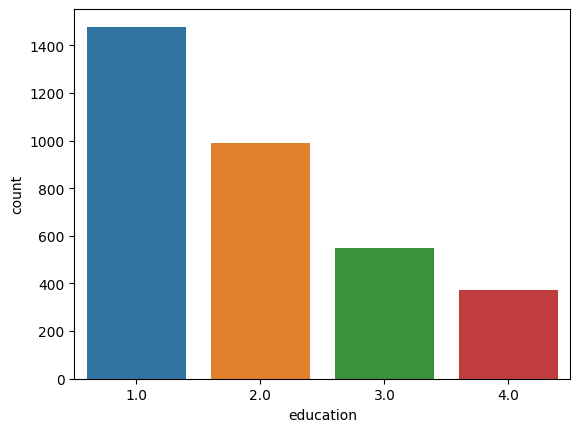

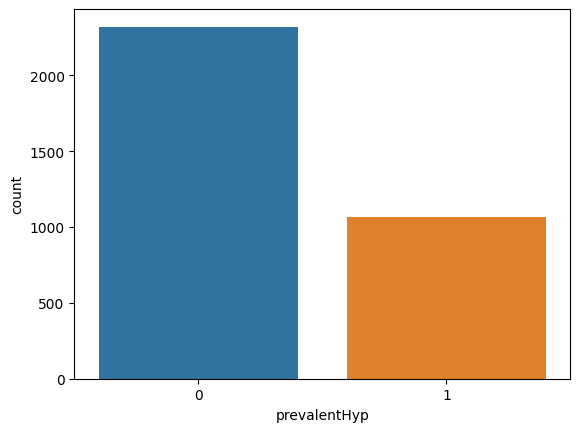

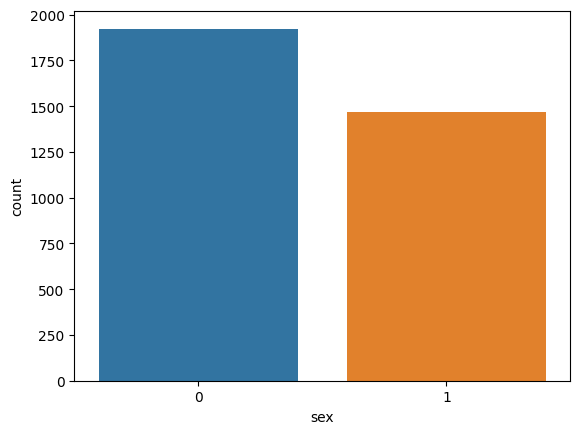

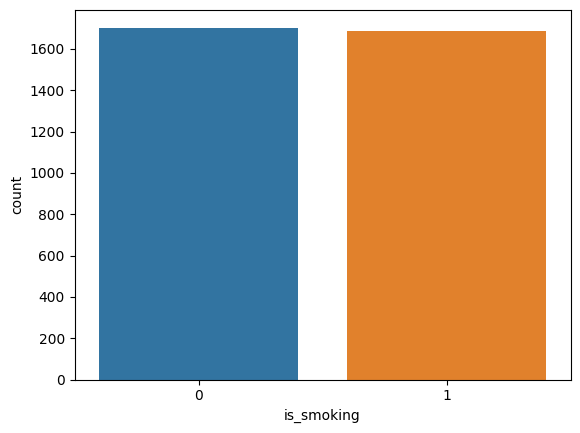

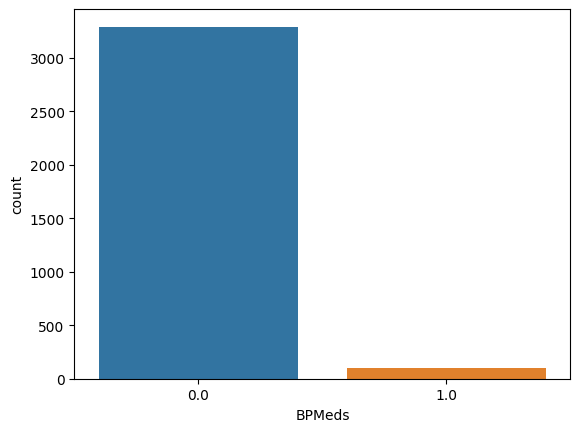

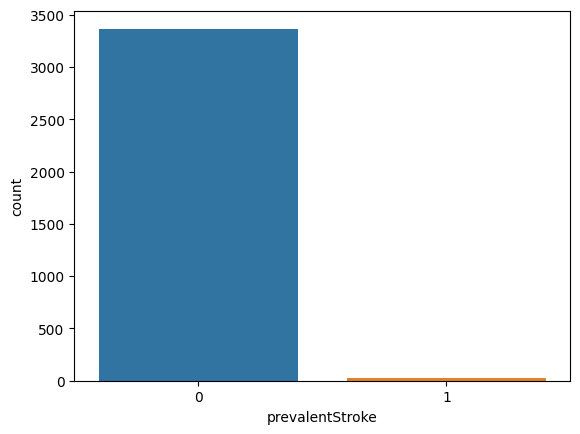

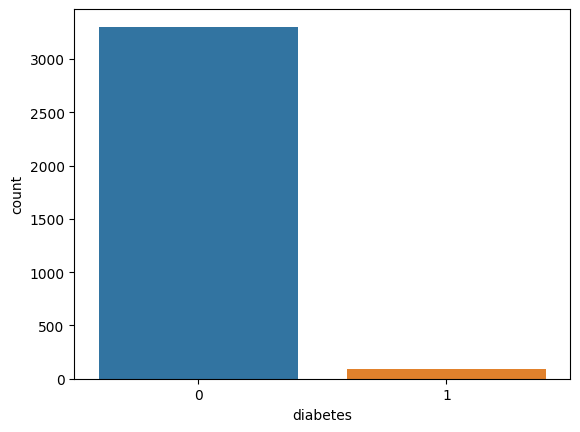

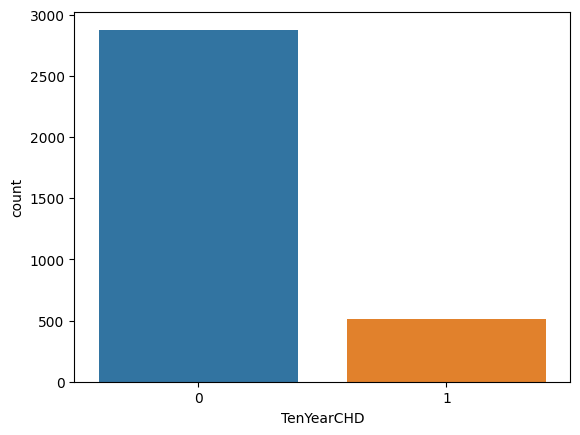

In [ ]:
for i in df[cat_vars].columns.tolist():
  sns.countplot(x=df[i])
  plt.xlabel(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Numerical Variable Distribution - Distplot

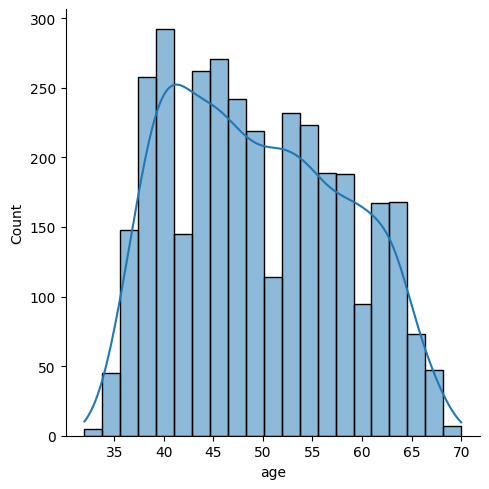

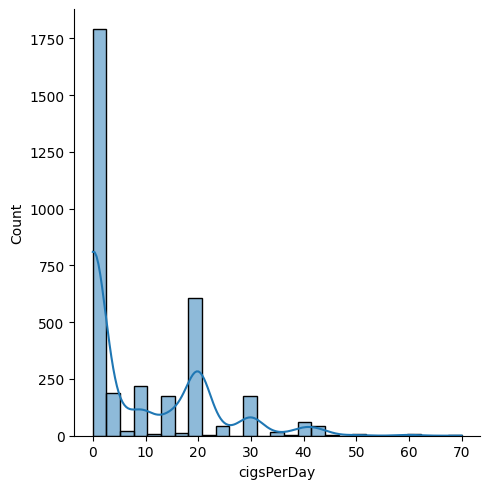

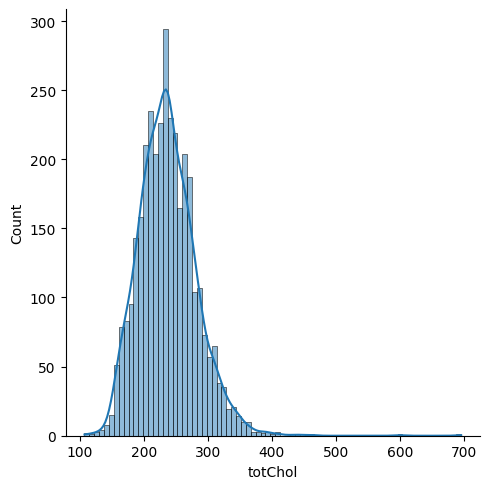

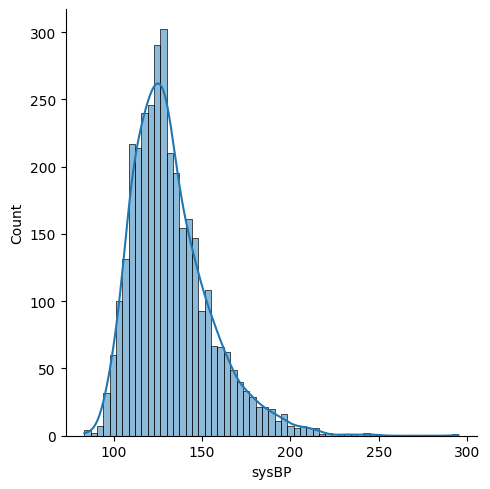

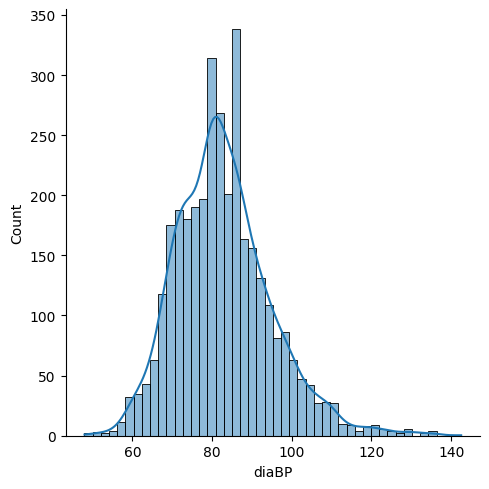

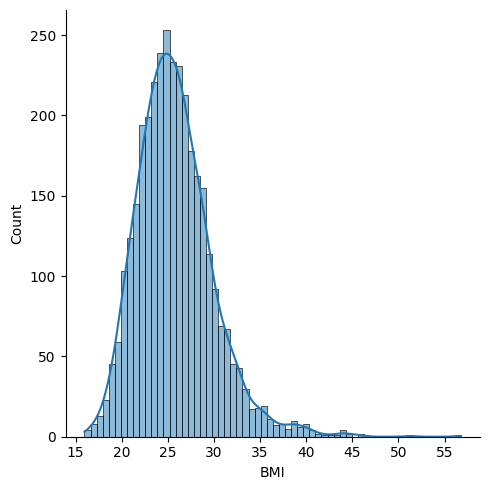

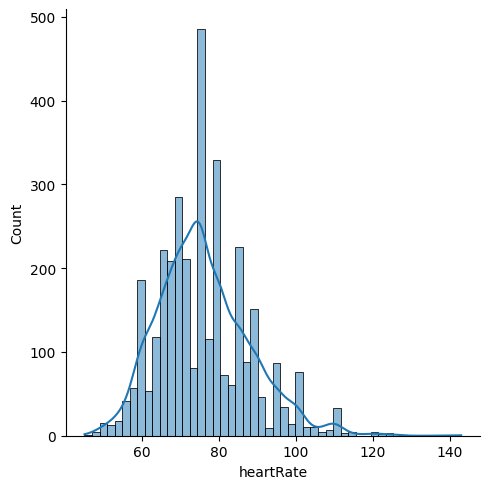

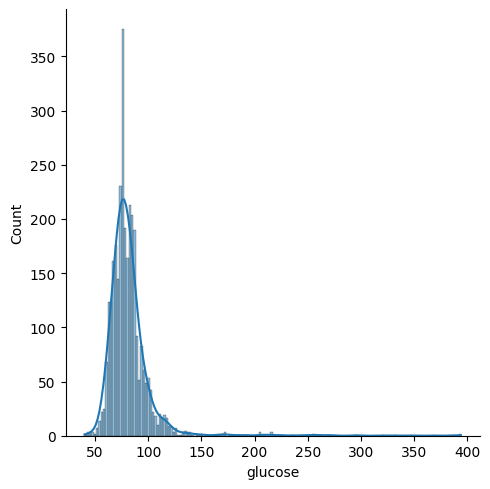

In [ ]:
for i in df[num_vars].columns.tolist():
  # sns.distplot(x=df[i])
  sns.displot(data=df, x=i, kde=True)
  plt.xlabel(i)
  plt.show()

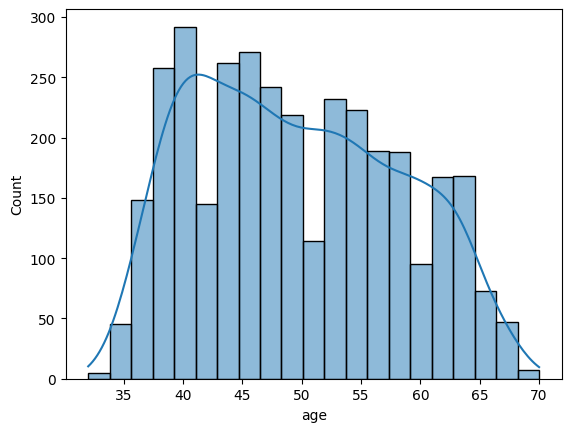

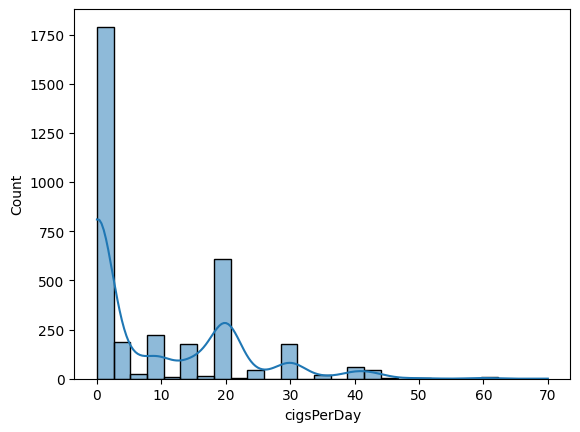

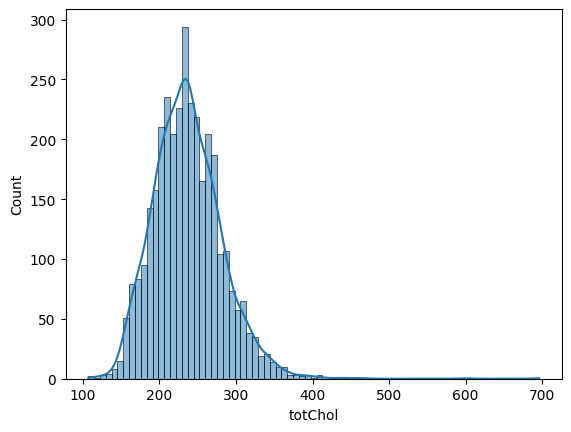

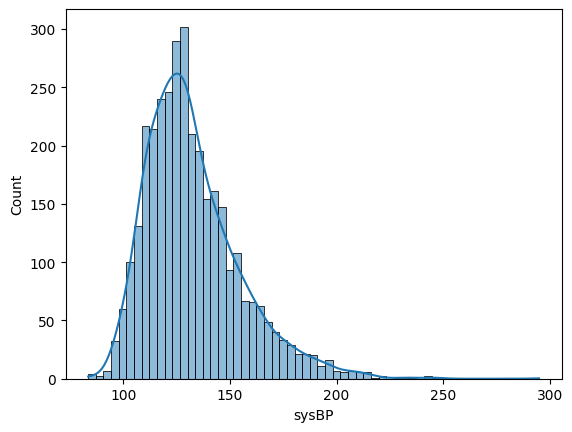

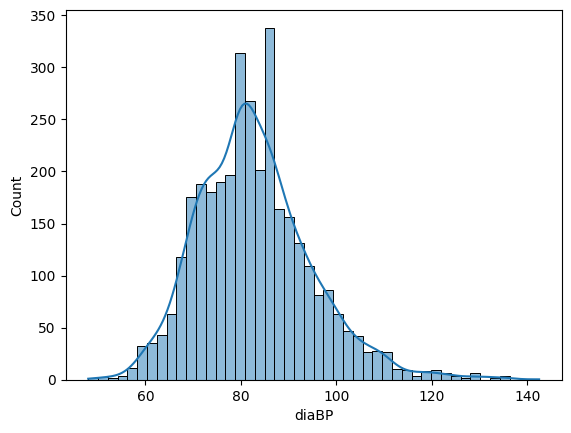

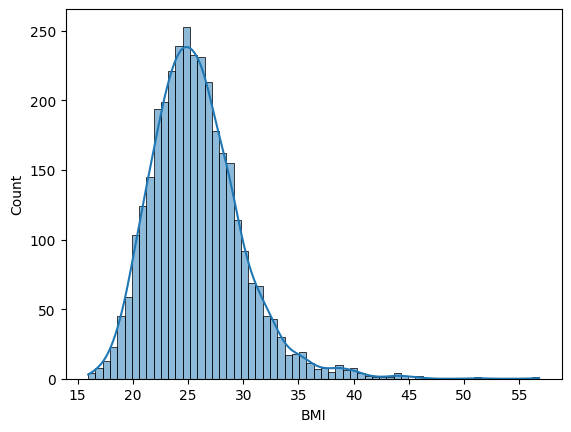

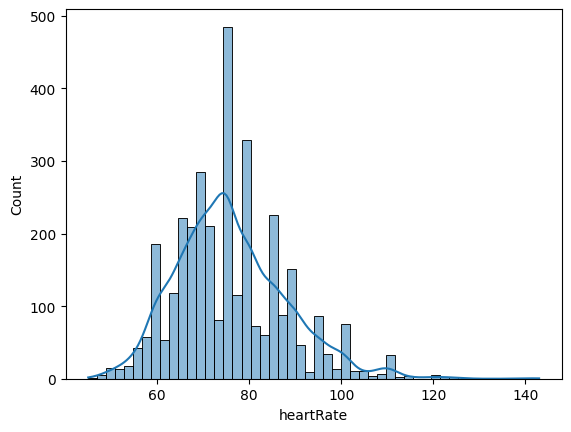

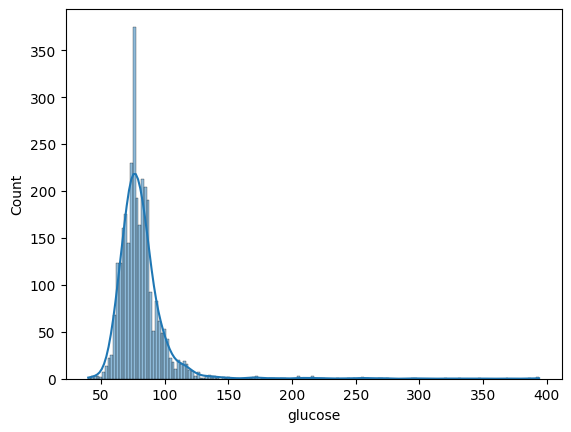

In [ ]:

for i in df[num_vars].columns.tolist():
  # sns.distplot(x=df[i])
  sns.histplot(data=df, x=i, kde=True)
  plt.xlabel(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Numerical variable and TenYearCH - Violin Plot

In [ ]:
# Chart - 3 visualization code

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


In [ ]:
print('numerical variables are: \n',num_vars,'\n','categorical variables are: \n',cat_vars)

numerical variables are: 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
 categorical variables are: 
 ['education', 'prevalentHyp', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']


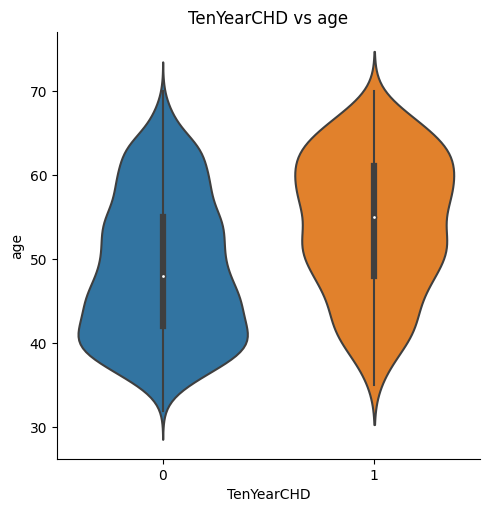

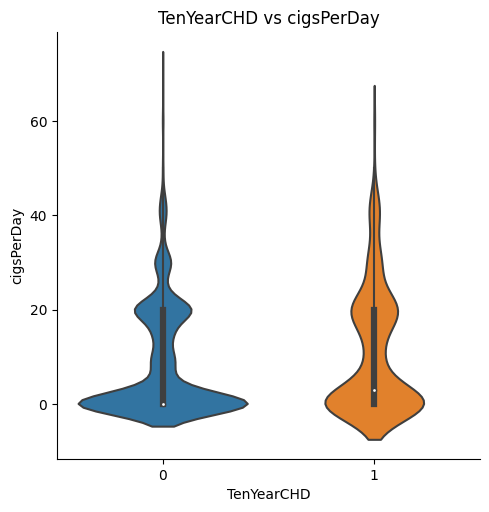

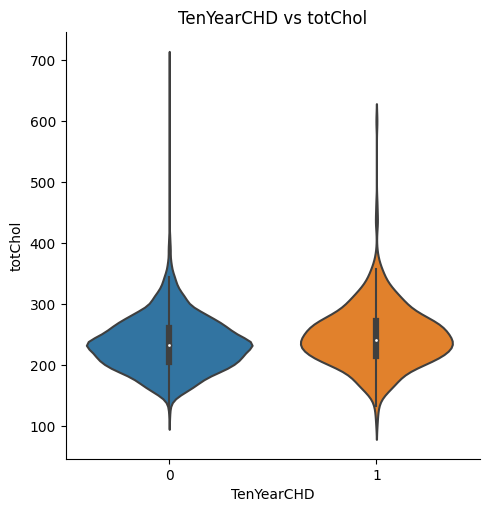

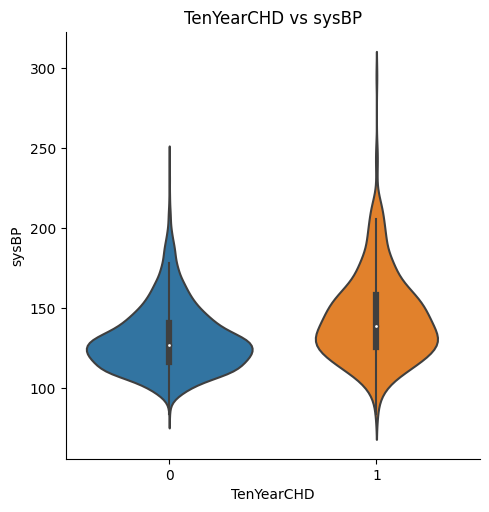

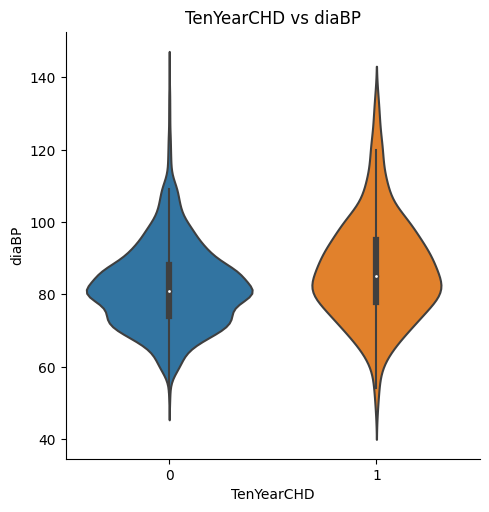

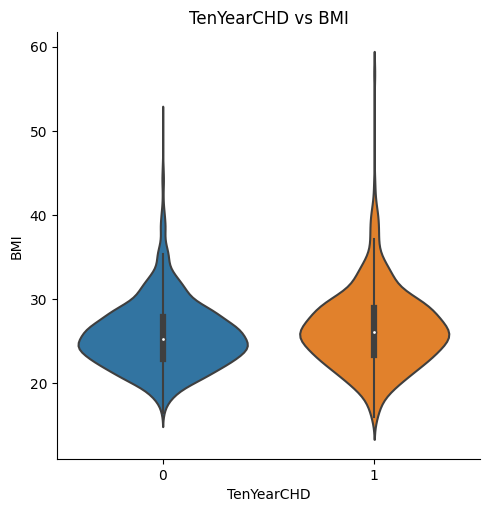

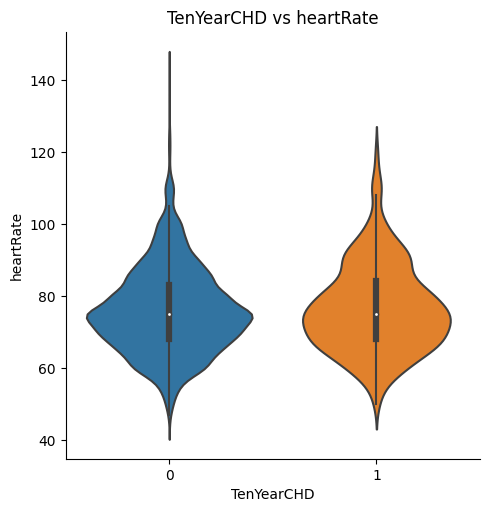

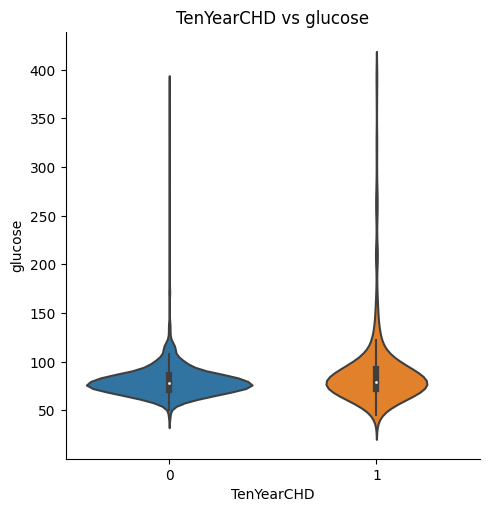

In [ ]:
for i in num_vars:
  sns.catplot(data=df,x='TenYearCHD',y=i,kind='violin',split=True)
  # sns.catplot(data=df,x='TenYearCHD',y=i,kind='violin',hue='sex',split=True)
  plt.title('TenYearCHD '+'vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Numerical Variable and TenYeadCHD - rel plot

In [ ]:
# Chart - 4 visualization code

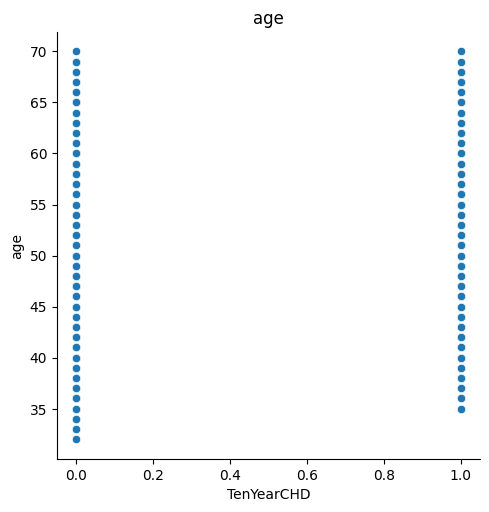

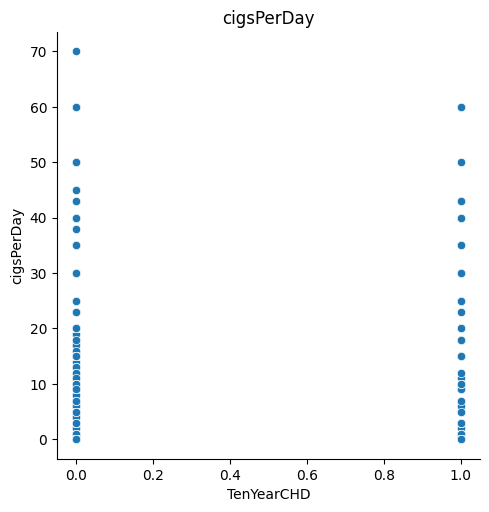

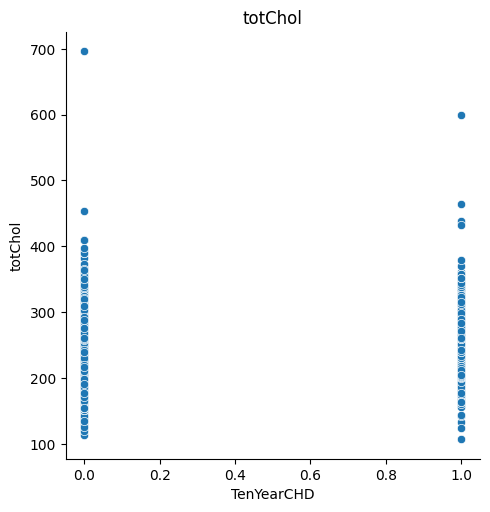

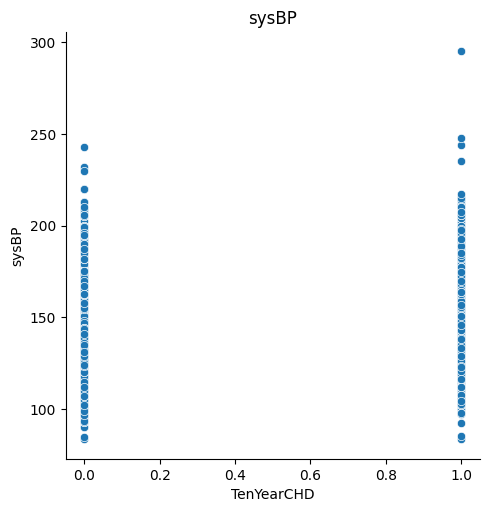

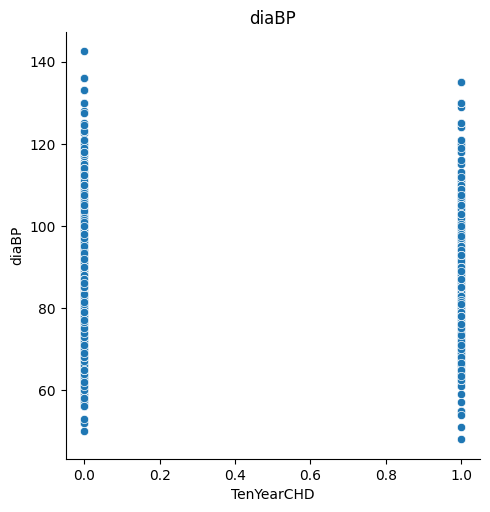

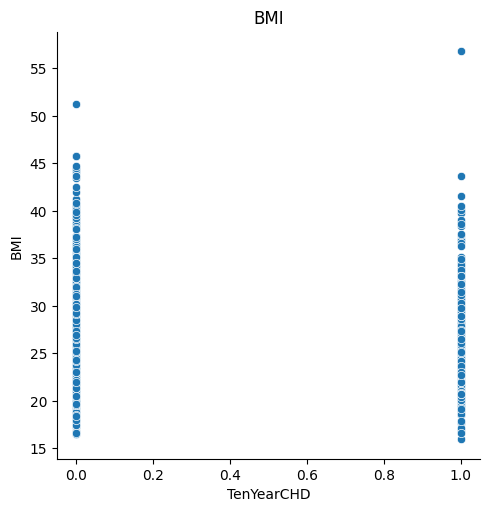

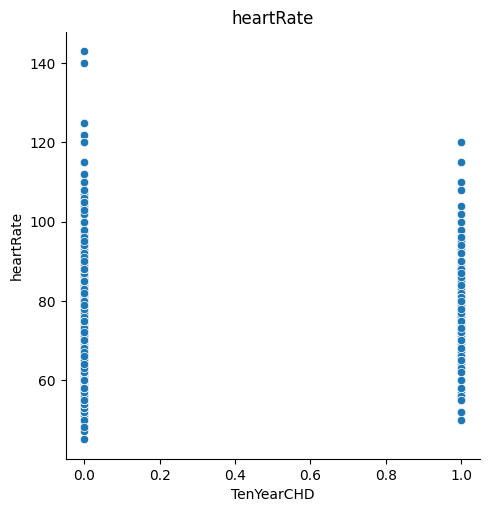

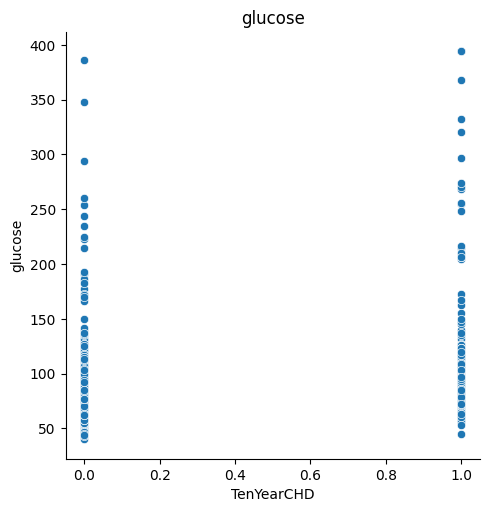

In [ ]:
for i in num_vars:
  # sns.displot(df,x=i,hue='TenYearCHD',kind='kde')
  sns.relplot(data=df, y=i, x="TenYearCHD")
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Numerical Variables Distribution and TenYearCHD - KDE Distribution

In [ ]:
# Chart - 5 visualization code

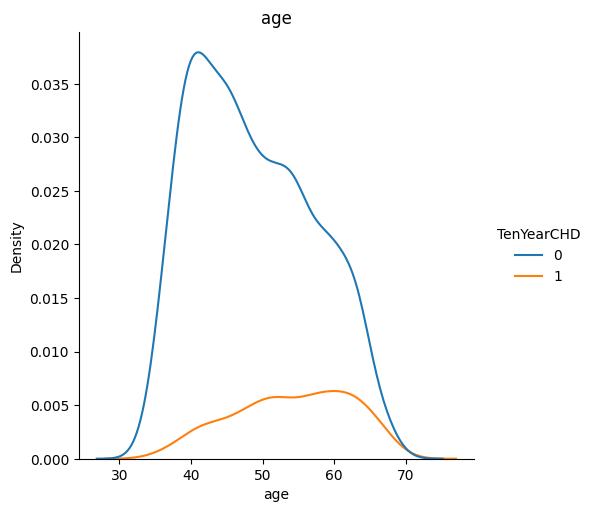

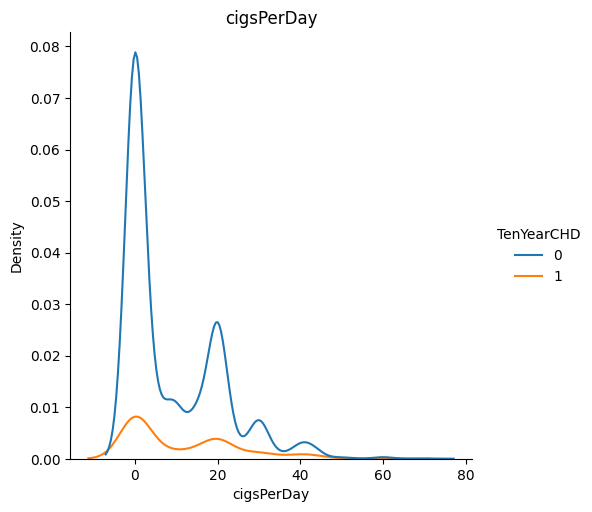

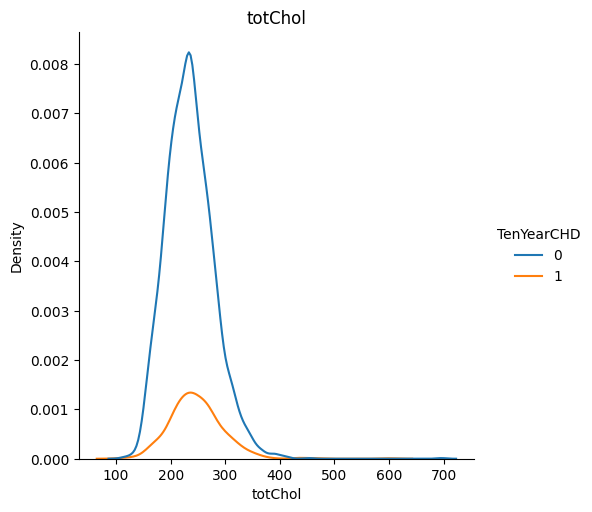

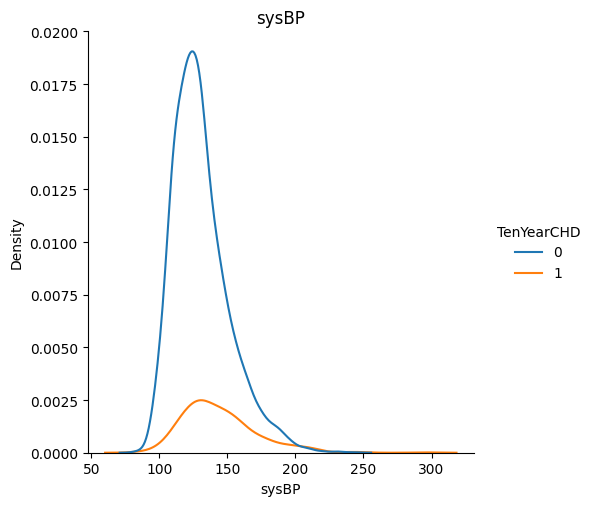

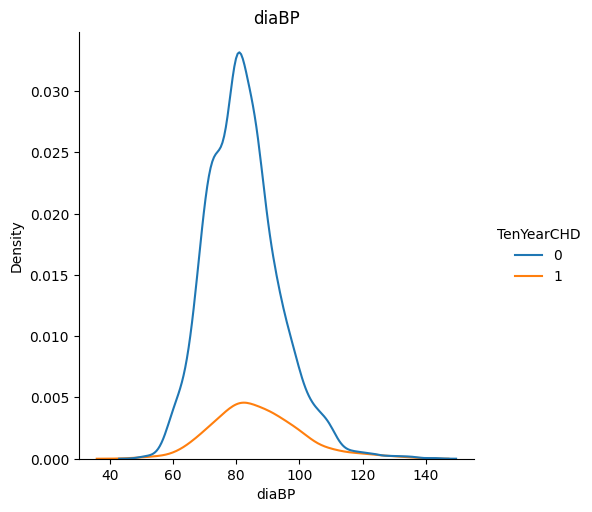

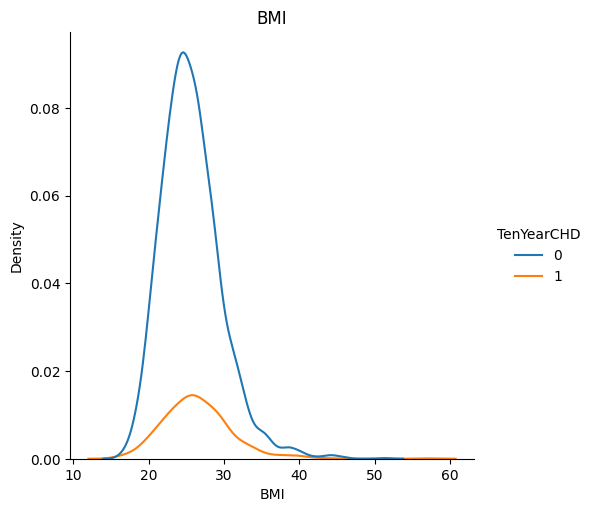

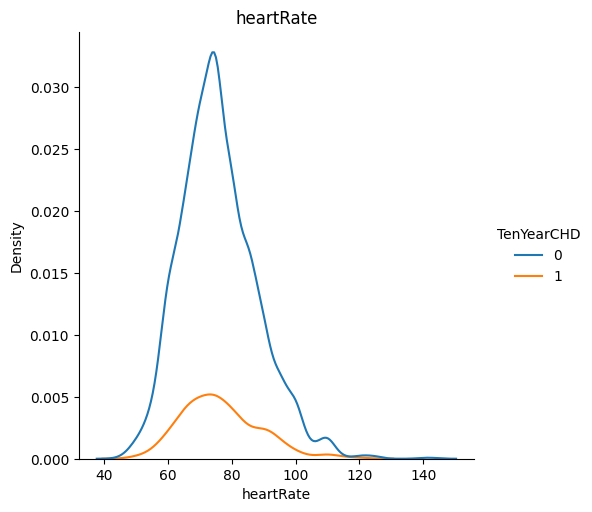

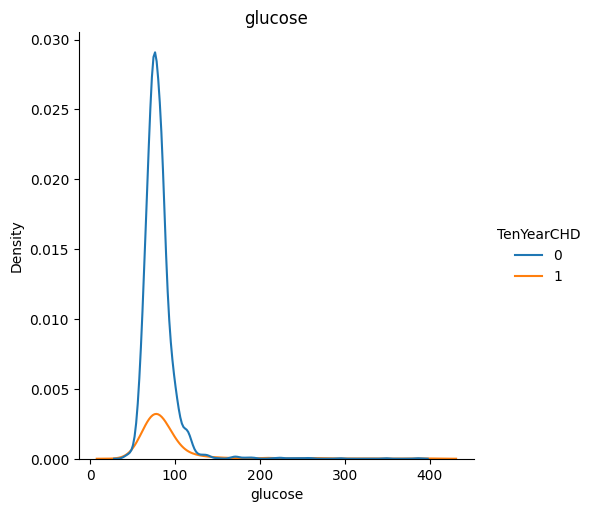

In [ ]:
for i in num_vars:
  sns.displot(df,x=i,kind='kde',hue='TenYearCHD')
  # sns.relplot(data=df, y=i, x="TenYearCHD")
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Categorical Variables and TenYearCHD - Stacked Bar Plot

In [ ]:
# Chart - 6 visualization code

<Figure size 1000x500 with 0 Axes>

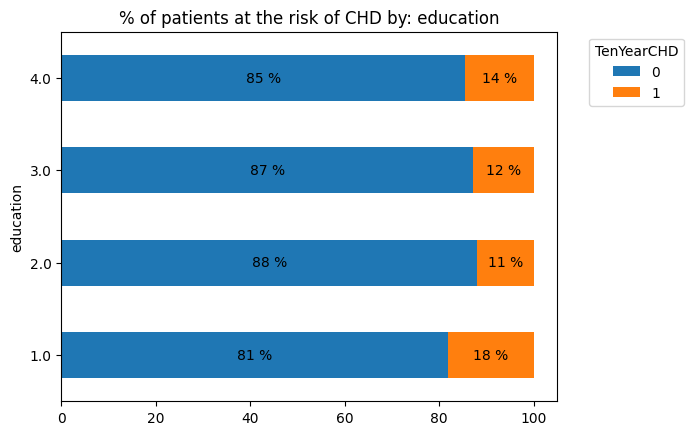

<Figure size 1000x500 with 0 Axes>

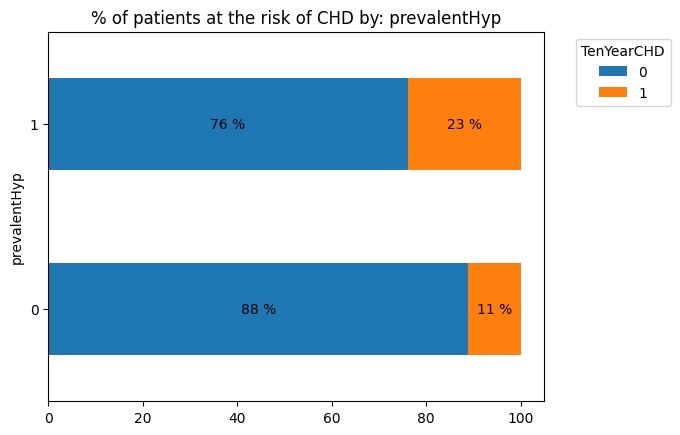

<Figure size 1000x500 with 0 Axes>

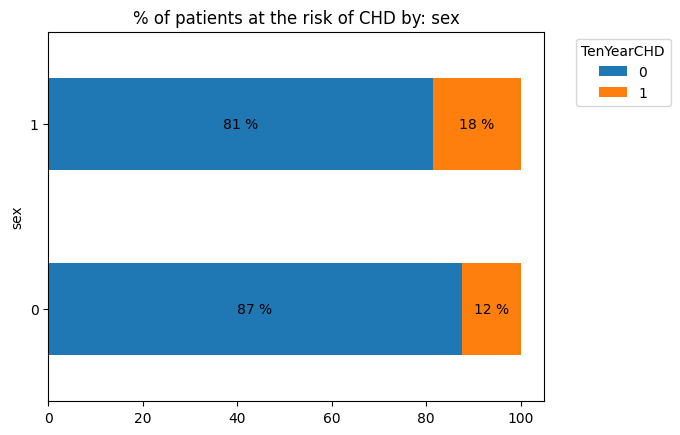

<Figure size 1000x500 with 0 Axes>

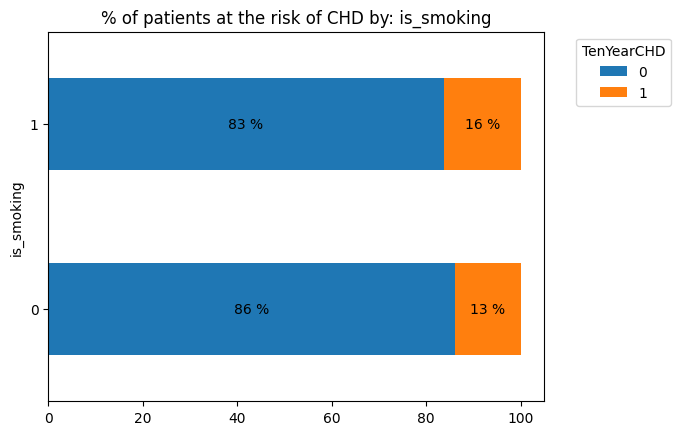

<Figure size 1000x500 with 0 Axes>

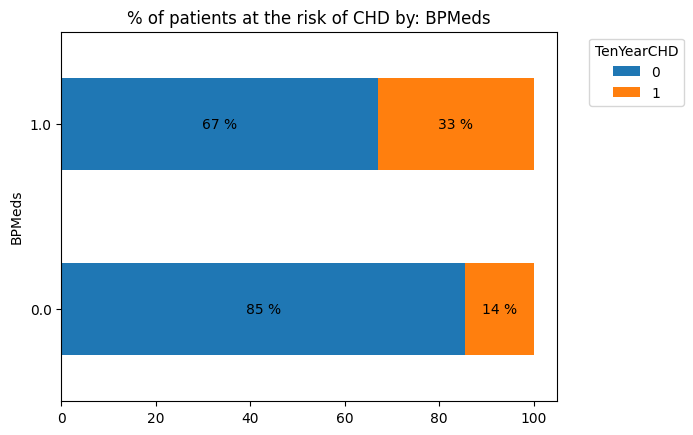

<Figure size 1000x500 with 0 Axes>

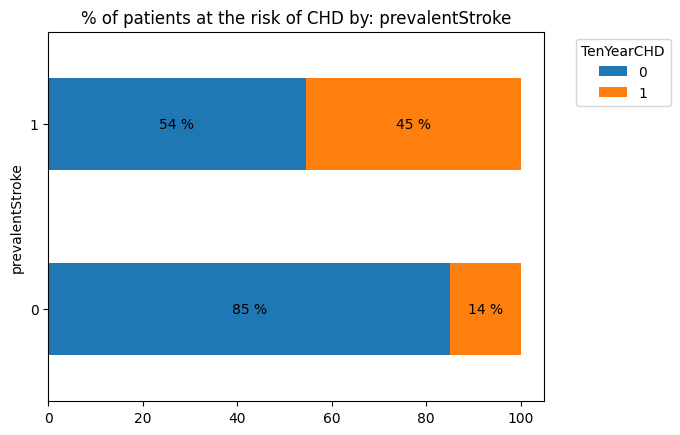

<Figure size 1000x500 with 0 Axes>

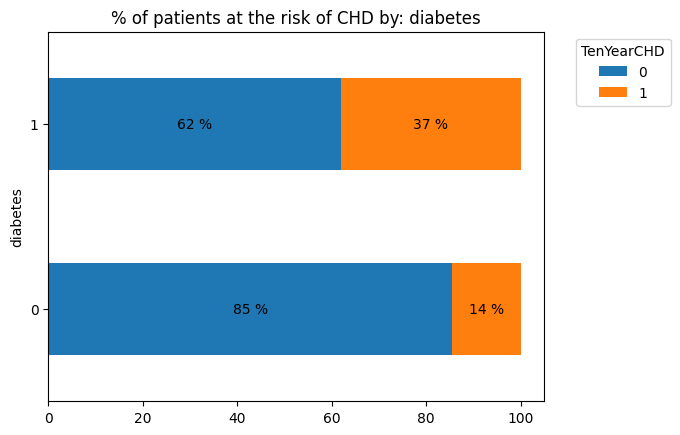

<Figure size 1000x500 with 0 Axes>

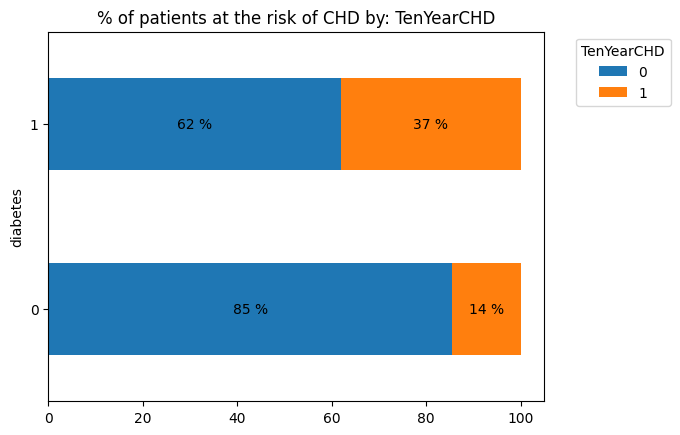

In [ ]:
for i in cat_vars:
    if i=='TenYearCHD':
      pass
    else:
      x_var, y_var = i, 'TenYearCHD'
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Categorical Variable and TenYearCHD - Bar Plot

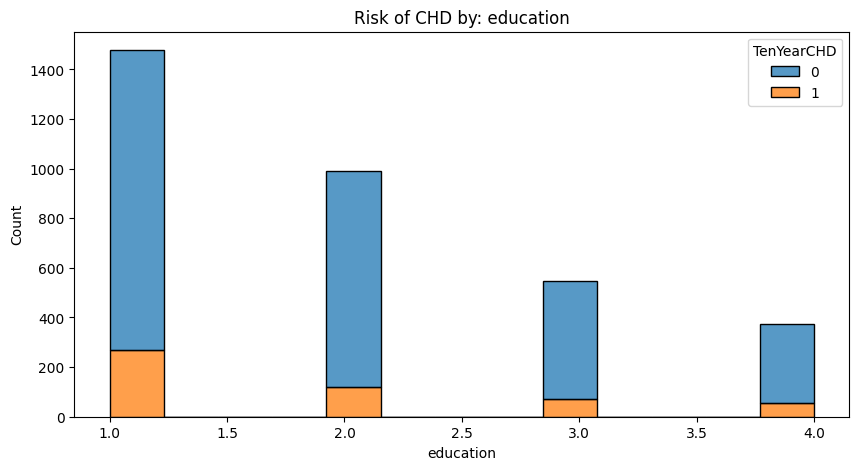

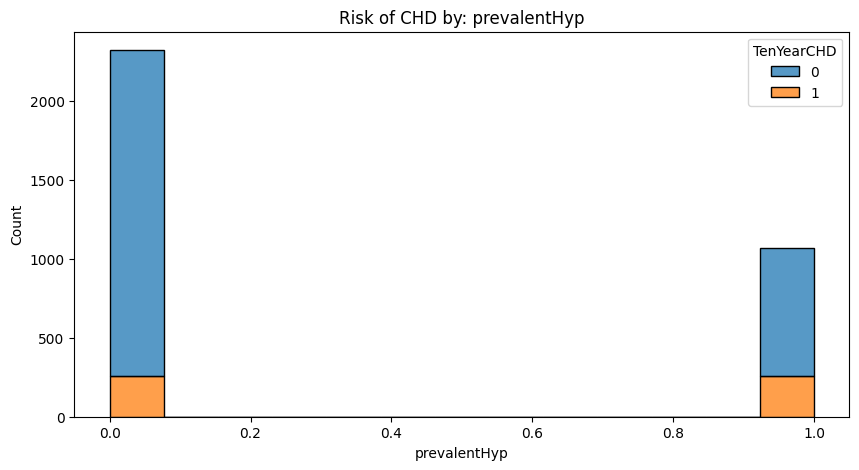

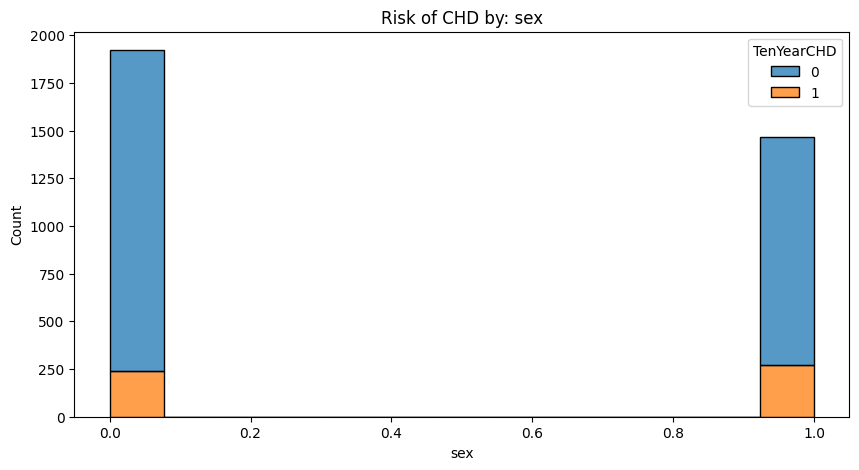

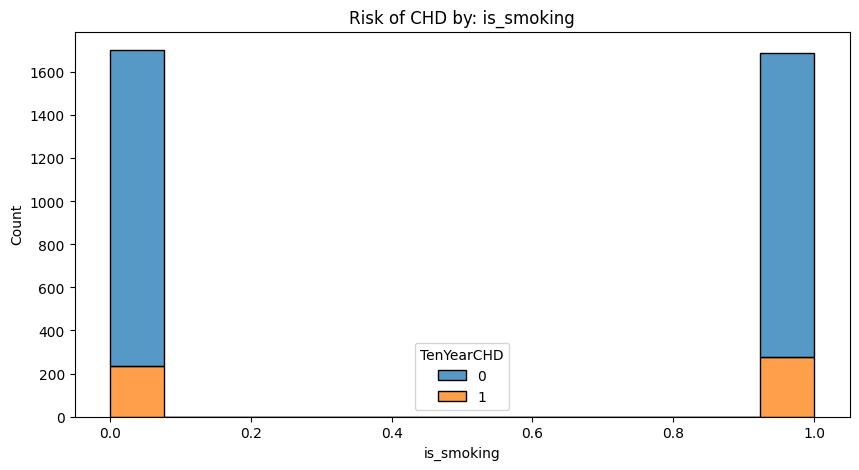

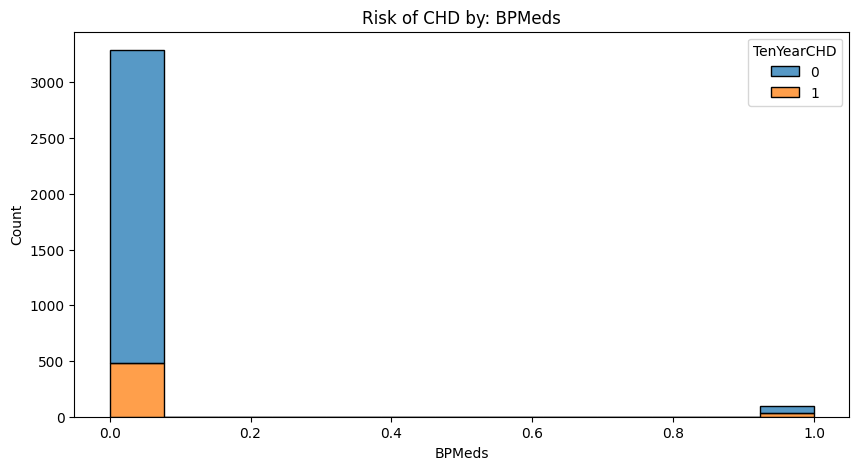

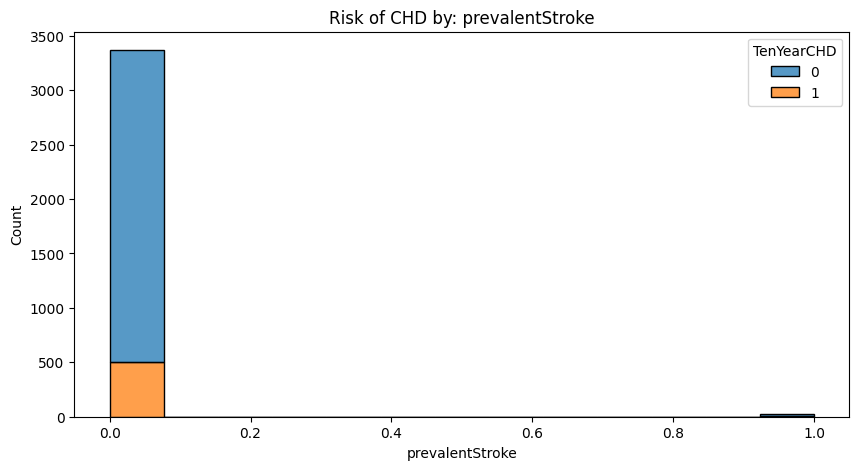

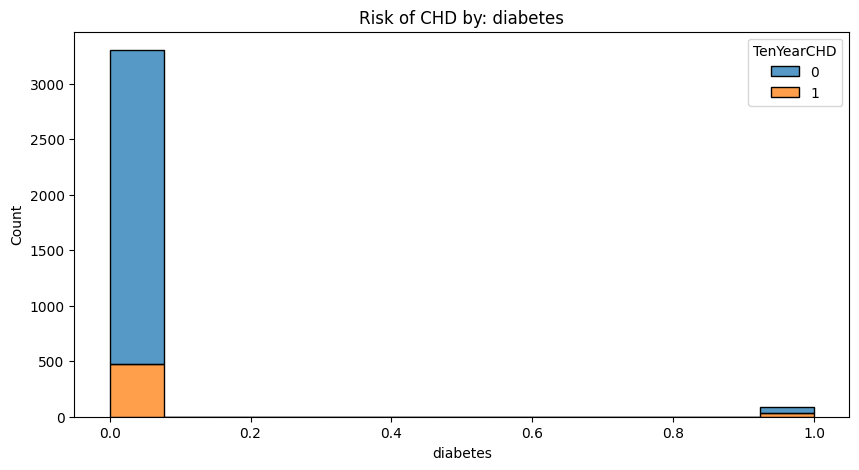

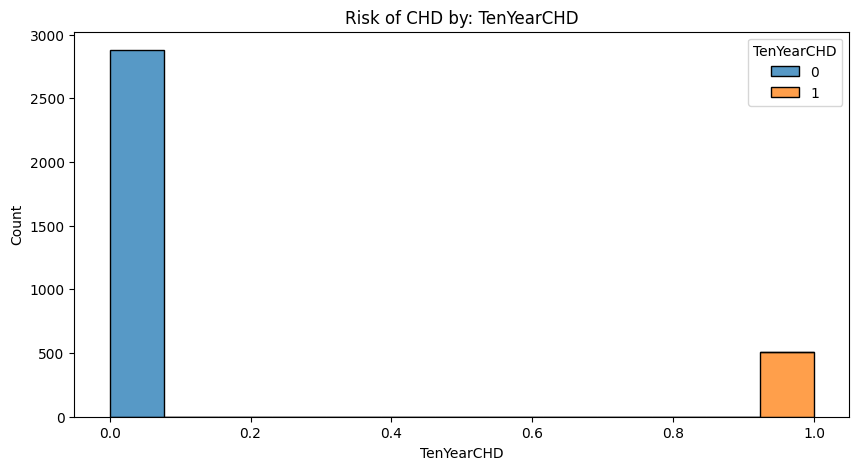

In [ ]:
for i in cat_vars:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue='TenYearCHD', data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


In [ ]:
print(cat_vars,'\n',num_vars)

['education', 'prevalentHyp', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD'] 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

In [ ]:
# sns.pairplot(df,hue='sex')

In [ ]:
# sns.pairplot(df,hue='TenYearCHD')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
    # ('add_variables', NewVariablesAdder()),
    # ('std_scaler', StandardScaler())
])

num_transformed = num_pipeline.fit_transform(df[num_vars])
num_transformed = pd.DataFrame(num_transformed)
num_transformed.columns = num_vars

In [ ]:
num_transformed.isna().sum()

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64

In [ ]:
num_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         3390 non-null   float64
 1   cigsPerDay  3390 non-null   float64
 2   totChol     3390 non-null   float64
 3   sysBP       3390 non-null   float64
 4   diaBP       3390 non-null   float64
 5   BMI         3390 non-null   float64
 6   heartRate   3390 non-null   float64
 7   glucose     3390 non-null   float64
dtypes: float64(8)
memory usage: 212.0 KB


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

The unique value for :

age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ('add_variables', NewVariablesAdder()),
    ('robust_scaler', RobustScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
data_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_vars),
    ('categorical', OneHotEncoder(), cat_vars),

])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [ ]:
df1 = df_org.copy()

In [ ]:
features = df1.loc[:,['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'diabetes', 'glucose', 'age', 'cigsPerDay', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']]
labels = pd.DataFrame(df1.loc[:,'TenYearCHD'])
print(features.columns,'\n',labels.columns)
print(features.shape,labels.shape)
print(df1.shape)

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'diabetes', 'glucose', 'age', 'cigsPerDay', 'prevalentHyp', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate'],
      dtype='object') 
 Index(['TenYearCHD'], dtype='object')
(3390, 15) (3390, 1)
(3390, 17)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        3303 non-null   float64
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   BPMeds           3346 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   diabetes         3390 non-null   int64  
 6   glucose          3086 non-null   float64
 7   age              3390 non-null   int64  
 8   cigsPerDay       3368 non-null   float64
 9   prevalentHyp     3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 397.4+ KB


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  3390 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


In [ ]:
features.isna().sum()

education           87
sex                  0
is_smoking           0
BPMeds              44
prevalentStroke      0
diabetes             0
glucose            304
age                  0
cigsPerDay          22
prevalentHyp         0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
dtype: int64

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Scaling your data

In [ ]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
features_processed = data_pipeline.fit_transform(df)
df_transformed = pd.DataFrame(features_processed)

In [ ]:
df_transformed.columns = data_pipeline.get_feature_names_out(input_features=df.columns)

In [ ]:
df_transformed.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1,categorical__TenYearCHD_0,categorical__TenYearCHD_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_transformed['TenYearCHD'] = labels
df_transformed.drop(['categorical__TenYearCHD_0','categorical__TenYearCHD_1'],axis=1,inplace=True)

In [ ]:
df_transformed.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1,TenYearCHD
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
df_transformed.isnull().sum().sum()

0

In [ ]:
df_transformed.dropna(inplace=True)

In [ ]:
df_transformed.iloc[:,:-1]

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_0,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.785714,0.00,0.465517,-0.185185,-0.193548,0.785103,-0.333333,1.923077,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3386,-0.214286,0.00,-0.603448,-0.981481,-1.677419,-0.688475,0.333333,0.461538,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3387,-0.357143,0.15,2.034483,1.314815,2.387097,0.712632,-0.133333,-0.461538,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3388,0.785714,0.00,-0.741379,1.425926,1.483871,-0.477101,0.333333,0.538462,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_transformed.iloc[:,-1]

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [ ]:
# Handle missing values with an imputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
df_transformed = pd.DataFrame(imputer.fit_transform(df_transformed), columns=df_transformed.columns)

In [ ]:
X = df_transformed.iloc[:,:-1]

In [ ]:
X.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_0,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y = df_transformed.iloc[:,-1].values.ravel()

In [ ]:
y=pd.Series(y)

In [ ]:
y.head(5)

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
dtype: float64

In [ ]:
# y.info()

In [ ]:
# y.isnull().sum()

In [ ]:
# y = y.loc[:,0].ravel()

In [ ]:
for train, test in split.split(X,y):
    X_train = X.iloc[train]
    y_train = y.iloc[train].to_numpy()
    X_test = X.iloc[test]
    y_test = y.iloc[test].to_numpy()

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2712, 24) (678, 24) (2712,) (678,)


In [ ]:
# y.loc[:,0]

In [ ]:
# print(X_train.isna().sum(),X_test.isna().sum(),y_train.isna().sum(),y_test.isna().sum())

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Apply BorderlineSMOTE to the training data
smote_variant = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_variant.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_model.score(X_train,y_train)

0.8591445427728613

In [ ]:
y_pred_m1=logistic_model.predict(X_test)
acc_m1=accuracy_score(y_pred_m1,y_test)

In [ ]:
print(acc_m1)

0.855457227138643


In [ ]:
y_pred = logistic_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.10909090909090909


An F1 score of 0.10909090909090909 is quite low, suggesting that the model's ability to correctly classify positive instances is limited.

- Check F-1 Score on both train and test to get better idea for underfit or overfit

- Grid Search CV
- Randomized Search CV

Use this for Hyperparameter Tuning

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
# Perform 5-fold cross-validation and calculate accuracy scores
cross_val_scores = cross_val_score(logistic_model, X, y, cv=10, scoring='accuracy');

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.85840708 0.85545723 0.86430678 0.85840708 0.85840708 0.86725664
 0.85545723 0.84955752 0.84660767 0.85840708]
Mean Accuracy: 0.8572271386430679


In [ ]:
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'max_iter': [100, 200, 300]
# }

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Only 'l2' penalty
    'max_iter': [100, 200, 300]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X, y)

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8563421828908554


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
logistic_model = LogisticRegression(C=0.1, max_iter=100, penalty='l2')
logistic_model.fit(X_train,y_train)
logistic_model.score(X_train,y_train)

0.8591445427728613

In [ ]:

logistic_model = LogisticRegression(C=0.1, max_iter=100, penalty='l2')
logistic_model.fit(X_train_resampled, y_train_resampled)
logistic_model.score(X_train_resampled, y_train_resampled)

0.7010421189752497

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.855457227138643
Precision: 0.75
Recall: 0.058823529411764705
F1 Score: 0.10909090909090909


Answer Here.

In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[574   2]
 [ 96   6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       576
         1.0       0.75      0.06      0.11       102

    accuracy                           0.86       678
   macro avg       0.80      0.53      0.52       678
weighted avg       0.84      0.86      0.80       678



### ML Model - 2 - Decision Tree Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_train, y_train)

1.0

In [ ]:
y_pred = decision_tree.predict(X_test)

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7669616519174042
Precision: 0.24545454545454545
Recall: 0.2647058823529412
F1 Score: 0.25471698113207547


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Accuracy on Test Data:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Score: 0.8362738102519147
Accuracy on Test Data: 0.8407079646017699


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 5)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_train, y_train)

0.8661504424778761

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 5)
decision_tree.fit(X_train_resampled, y_train_resampled)
decision_tree.score(X_train_resampled, y_train_resampled)

0.7481545809813287

In [ ]:
y_pred = decision_tree.predict(X_test)

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6135693215339233
Precision: 0.22413793103448276
Recall: 0.6372549019607843
F1 Score: 0.33163265306122447


#### Condusion Matrix

In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[351 225]
 [ 37  65]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73       576
         1.0       0.22      0.64      0.33       102

    accuracy                           0.61       678
   macro avg       0.56      0.62      0.53       678
weighted avg       0.80      0.61      0.67       678



Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Support Vector Classifier

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
# Create and train a Support Vector Classifier
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set using the score method
accuracy = svc.score(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = svc.predict(X_test)


Accuracy: 0.8495575221238938


In [ ]:
# Evaluate the model's performance using different metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8495575221238938
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[576   0]
 [102   0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       576
         1.0       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4 - Random Forest Classifier

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from imblearn.pipeline import make_pipeline

In [ ]:
# Create a pipeline with oversampling, undersampling, and classifier steps
pipeline = make_pipeline(
    RandomOverSampler(sampling_strategy=0.5),
    RandomUnderSampler(sampling_strategy=0.8),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[542  34]
 [ 81  21]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       576
         1.0       0.38      0.21      0.27       102

    accuracy                           0.83       678
   macro avg       0.63      0.57      0.59       678
weighted avg       0.80      0.83      0.81       678



In [ ]:
# Separate majority and minority classes in the training data
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                               replace=True,             # Sample with replacement
                               n_samples=len(majority_class),  # Match majority class size
                               random_state=42)

# Combine majority class with upsampled minority class
upsampled_X_train = pd.concat([majority_class, minority_upsampled])
upsampled_y_train = pd.concat([pd.Series([0]*len(majority_class)), pd.Series([1]*len(minority_upsampled))])

# Train the HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       576
         1.0       0.30      0.08      0.12       102

    accuracy                           0.83       678
   macro avg       0.58      0.52      0.52       678
weighted avg       0.77      0.83      0.79       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report
# from sklearn.ensemble import HistGradientBoostingClassifier  # Import your chosen model

# # # Assuming you have your features (X) and target variable (y) ready
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to the training data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import classification_report

# # Assuming you have already split your data into X_train, X_test, y_train, y_test

# # Apply BorderlineSMOTE to the training data
# smote_variant = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote_variant.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [ ]:
# from imblearn.over_sampling import ADASYN
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import classification_report

# # Assuming you have already split your data into X_train, X_test, y_train, y_test

# # Apply ADASYN to the training data
# adasyn = ADASYN(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

### **Comparison between ML models used**-

All resampling techniques have improved the F1-Score for class 1.0 compared to the initial results without resampling.
Among the three techniques, "Borderline SMOTE" has the highest F1-Score for class 1.0 (0.22), followed by "SMOTE" (0.18), and "ADASYN" (0.18).
"Borderline SMOTE" also has the highest overall accuracy (0.81), followed by "ADASYN" (0.80), and "SMOTE" (0.80).

Based on the provided results, "Borderline SMOTE" appears to offer the best balance between improving F1-Score for class 1.0 and maintaining a reasonable level of overall accuracy. Therefore, "Borderline SMOTE" may be the preferred resampling technique in this context.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***